In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets,transforms

In [2]:
is_cuda = False
if torch.cuda.is_available():
    is_cuda = True

# Load data

In [3]:
transformation = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,),(0.3081,))])

In [4]:
train_dataset = datasets.MNIST('data/', train=True, transform=transformation, download=True)
test_dataset = datasets.MNIST('data/', train=False, transform=transformation, download=True)

Extracting data/MNIST\raw\train-images-idx3-ubyte.gz to data/MNIST\raw


Extracting data/MNIST\raw\train-labels-idx1-ubyte.gz to data/MNIST\raw


Extracting data/MNIST\raw\t10k-images-idx3-ubyte.gz to data/MNIST\raw


Extracting data/MNIST\raw\t10k-labels-idx1-ubyte.gz to data/MNIST\raw
Processing...
Done!


C:\Users\Yeonkang\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)

In [6]:
def plot_img(image):
    image = image.numpy()[0]
    mean,std = 0.1307,0.3081
    image = std * image + mean
    plt.imshow(image, cmap='gray')

1. Convert tensor to numpy, then choose the first element
 - second element of *image.numpy()* contains labels of each image
2. Denormalize data
3. Plot the image
 - *cmap* option is used to map scalar data to colors

In [7]:
sample_data = next(iter(train_loader))
sample_data

[tensor([[[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           ...,
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],
 
 
         [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           ...,
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],
 
 
         [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
       

In [8]:
sample_data[0][1].numpy().shape

(1, 28, 28)

- number of RGB channels X height X width

In [9]:
sample_data[0][1].numpy()[0].shape

(28, 28)

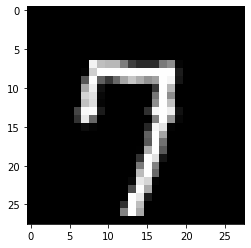

In [10]:
plot_img(sample_data[0][1])

# Build vanilla CNN

In [11]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5, stride=1, padding=0)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5, stride=1, padding=0)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320,50)
        self.fc2 = nn.Linear(50,10)
        
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        y = x.view(-1,320)
        return x,y

In [12]:
def fit(epoch, model, data_loader, phase='training', volatile=False):
    if phase == 'training':
        model.train()
    if phase == 'validation':
        model.eval()
        volatile = True
    running_loss = 0.0
    running_correct = 0
    
    for batch_idx, (data,target) in enumerate(data_loader):
        if is_cuda:
            data,target = data.cuda(),target.cuda()
        data,target = Variable(data,volatile),Variable(target)
        if phase == 'training':
            optimizer.zero_grad()
        x,y = model(data)
            
    return x,y

In [13]:
model = Net()
if is_cuda:
    model.cuda()

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
x,y = fit(1, model, train_loader, phase='training')

In [14]:
x.shape

torch.Size([32, 20, 4, 4])

In [15]:
y.shape

torch.Size([32, 320])

In [16]:
x.view(320,-1).shape

torch.Size([320, 32])

- 11~16: Code for explaining how does *view* work

In [17]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5, stride=1, padding=0)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5, stride=1, padding=0)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320,50)
        self.fc2 = nn.Linear(50,10)
        
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1,320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x,dim=1)

In [18]:
def fit(epoch, model, data_loader, phase='training', volatile=False):
    if phase == 'training':
        model.train()
    if phase == 'validation':
        model.eval()
        volatile = True
    running_loss = 0.0
    running_correct = 0
    
    for batch_idx,(data,target) in enumerate(data_loader):
        if is_cuda:
            data,target = data.cuda(),target.cuda()
        data,target = Variable(data,volatile),Variable(target)
        if phase == 'training':
            optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output,target)
        running_loss += F.nll_loss(output, target, reduction='mean').data
        preds = output.data.max(dim=1, keepdim=True)[1]
        running_correct += preds.eq(target.data.view_as(preds)).cpu().sum()
        if phase == 'training':
            loss.backward()
            optimizer.step()
            
    loss = running_loss.item()/len(data_loader.dataset)
    accuracy = 100.0 * running_correct.item()/len(data_loader.dataset)
            
    print(f'{phase} loss is {loss:{5}.{2}} and {phase} accuracy is {running_correct}/{len(data_loader.dataset)} {accuracy:{10}.{4}}')
    return loss,accuracy

- *volatile=True* implies that you won't be running backpropagation; this conserves memory
- *dim=1* implies that we will find the maximum for each image
- [1] under *keepdim=True* implies the we will find the label which has the highest probability(largest output)

In [19]:
a = torch.randn(4, 4)
a

tensor([[-1.0756,  0.2701,  2.2026, -0.1525],
        [-0.7786, -1.5640,  0.2545, -0.0293],
        [ 0.8314,  0.8627, -1.4847,  3.5095],
        [-0.7406, -0.3552,  1.0020, -0.2429]])

In [20]:
torch.max(a, 1)

torch.return_types.max(
values=tensor([2.2026, 0.2545, 3.5095, 1.0020]),
indices=tensor([2, 2, 3, 2]))

In [21]:
torch.max(a,1,keepdim=True)

torch.return_types.max(
values=tensor([[2.2026],
        [0.2545],
        [3.5095],
        [1.0020]]),
indices=tensor([[2],
        [2],
        [3],
        [2]]))

- 19~21: Code for explaining how does *output.data.max* work

In [22]:
model = Net()
if is_cuda:
    model.cuda()

In [23]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
train_losses,train_accuracy = [],[]
val_losses,val_accuracy = [],[]

for epoch in range(1,20):
    train_epoch_loss,train_epoch_accuracy = fit(epoch, model, train_loader, phase='training')
    val_epoch_loss,val_epoch_accuracy = fit(epoch, model, test_loader,phase='validation')
    train_losses.append(train_epoch_loss)
    train_accuracy.append(train_epoch_accuracy)
    val_losses.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)

training loss is 0.021 and training accuracy is 46799/60000       78.0
validation loss is 0.0039 and validation accuracy is 9627/10000      96.27
training loss is 0.0092 and training accuracy is 54759/60000      91.27
validation loss is 0.0026 and validation accuracy is 9735/10000      97.35
training loss is 0.0075 and training accuracy is 55764/60000      92.94
validation loss is 0.0021 and validation accuracy is 9787/10000      97.87
training loss is 0.0065 and training accuracy is 56326/60000      93.88
validation loss is 0.002 and validation accuracy is 9815/10000      98.15
training loss is 0.006 and training accuracy is 56658/60000      94.43
validation loss is 0.0017 and validation accuracy is 9824/10000      98.24
training loss is 0.0054 and training accuracy is 56931/60000      94.89
validation loss is 0.0018 and validation accuracy is 9820/10000       98.2
training loss is 0.0052 and training accuracy is 57083/60000      95.14
validation loss is 0.0016 and validation accuracy

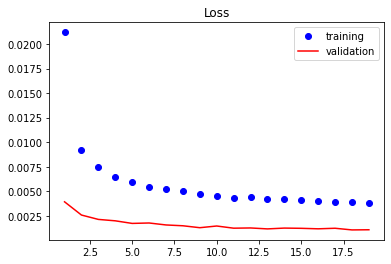

In [24]:
plt.plot(range(1,len(train_losses)+1), train_losses, 'bo', label='training')
plt.plot(range(1,len(val_losses)+1), val_losses, 'r', label='validation')
plt.title('Loss')
plt.legend()

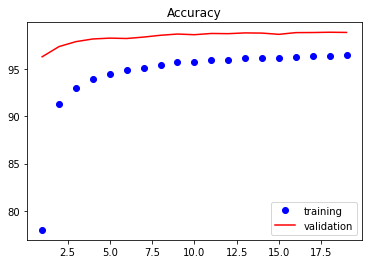

In [25]:
plt.plot(range(1,len(train_accuracy)+1), train_accuracy, 'bo', label='training')
plt.plot(range(1,len(val_accuracy)+1), val_accuracy, 'r', label='validation')
plt.title('Accuracy')
plt.legend()